
# Assignment 1: Code for dataset preparation report
##### Aliia Gismatullina s4051304

------
## Table of contents
------
### 1 Data Preparation

#### 1.1 Load the data

#### 1.2 Data Curation

- 1.2.1 'Index' column
- 1.2.2 'Age' column
- 1.2.3 'Resigned' column
- 1.2.4 'BusinessTravel' column
- 1.2.5 'BusinessUnit' column
- 1.2.6 'EducationLevel' column
- 1.2.7 'Gender' column
- 1.2.8 'JobSatisfaction' column
- 1.2.9 'MaritalStatus' column
- 1.2.10 'MonthlyIncome' column
- 1.2.11 'NumCompaniesWorked' column
- 1.2.12 'OverTime' column
- 1.2.13 'PercentSalaryHike' column
- 1.2.14 'PerformanceRating' column
- 1.2.15 'AverageWeeklyHoursWorked' column
- 1.2.16 'TotalWorkingYears' column
- 1.2.17 'TrainingTimesLastYear' column
- 1.2.18 'WorkLifeBalance' column
- 1.2.19 'YearsAtCompany' column
- 1.2.20 'YearsInRole' column
- 1.2.21 'YearsSinceLastPromotion' column
- 1.2.22 'YearsWithCurrManager' column

### 2 Data Exploration
------

## 1 Data Preparation
-------
### 1.1 Load the data

In [1]:
# Loading the libraries I will need throughout the report.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the data
# I will specify that the 0 column should be an index column.

df_url = 'A1_HR_Employee_Data.csv'
df = pd.read_csv(df_url, decimal = '.', index_col = 0)
df.head(5) # viewing the first 5 rows to make sure it has been loaded correctly.

,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
7912,41,Yes,Travel_Rarely,Sales,2.0,Female,4.0,Single,5993.0,8,...,11,3,63.0,8,0,1.0,6,4,0,5
1520,49,No,Travel_Frequently,Consultants,1.0,Male,2.0,Married,5130.0,1,...,23,4,40.0,10,3,3.0,10,7,1,7
1488,37,Yes,Travel_Rarely,Consultants,2.0,Male,3.0,Single,2090.0,6,...,15,3,50.0,7,3,3.0,0,0,0,0
2535,33,No,Travel_Frequently,Consultants,4.0,Female,3.0,Married,2909.0,1,...,11,3,48.0,8,3,3.0,8,7,3,0
4582,27,No,Travel_Rarely,Consultants,1.0,Male,2.0,Married,3468.0,9,...,12,3,40.0,6,3,3.0,2,2,2,2


### 1.2 Data curation

Let's get more familiar with our DataFrame. Firstly, I will check the existing columns and their data types. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 7912 to 3238
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1482 non-null   object 
 1   Resigned                  1480 non-null   object 
 2   BusinessTravel            1482 non-null   object 
 3   BusinessUnit              1482 non-null   object 
 4   EducationLevel            1481 non-null   float64
 5   Gender                    1482 non-null   object 
 6   JobSatisfaction           1481 non-null   float64
 7   MaritalStatus             1482 non-null   object 
 8   MonthlyIncome             1479 non-null   float64
 9   NumCompaniesWorked        1482 non-null   int64  
 10  OverTime                  1479 non-null   object 
 11  PercentSalaryHike         1482 non-null   int64  
 12  PerformanceRating         1482 non-null   int64  
 13  AverageWeeklyHoursWorked  1482 non-null   float64
 14  Total

In [3]:
# So it's 1482 rows in total, and here we can see the rows with missing values.
# I will list the columns and keep them in mind during scanning. 

missing_values_columns = df.columns[df.isna().any()].tolist()
missing_values_columns

['Resigned',
 'EducationLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'OverTime',
 'WorkLifeBalance']

Now, I will go step-by-step to correct all the data types. 

To begin with, I'd like to create several functions for common and repetitive steps to make the code more reusable.

##### Functions

In [4]:
# Function to sort and retrieve the unique values in ascending order from a column
def get_sorted_unique(data_frame, column_name):
    sorted_unique_values = sorted(data_frame[column_name].unique())
    return sorted_unique_values

# Function to convert column values to uppercase
def convert_to_uppercase(df, column_name):
    df[column_name] = df[column_name].str.upper()

# Function to convert a column to a category data type
def convert_to_category(df, column_name):
    df[column_name] = df[column_name].astype('category')

# Function to replace missing values with the mode value of a column
def replace_missing_with_mode(df, column_name):
    mode_value = df[column_name].mode().iloc[0]
    df[column_name].fillna(mode_value, inplace = True)
    
# Function to replace values in a column
def replace_values(df, column_name, replacement_dict):
    df[column_name].replace(replacement_dict, inplace = True)
    
# Function to remove white spaces from a column
def remove_whitespace(df, column_name):
    df[column_name] = df[column_name].str.strip()
    
# Function to count missing values in a column
def count_missing_values(df, column_name):
    nan_values = df[column_name].isna()
    return nan_values.value_counts()

# Function to convert a column to an ordinal data type with a specified order
def convert_to_ordinal(df, column_name, order):
    df[column_name] = pd.Categorical(df[column_name], categories=order, ordered=True)
    
# Function to convert a binary column to integer values (1 and 0)
def convert_to_binary(df, column_name):
    df[column_name] = df[column_name].map({'Yes': 1, 'No': 0}).astype(int)

#### 1.2.1 Index column

In [5]:
# As the index column does not serve as a feature during ML process, I will replace it with new random numbers.
df = df.sample(frac = 1).reset_index(drop = True)

df.head(5)

,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,No,Non-Travel,Sales,3.0,Female,4.0,Single,5666.0,1,...,13,3,48.0,6,1,3.0,5,3,1,3
1,54,No,Travel_Rarely,Sales,4.0,Female,3.0,Married,10686.0,6,...,11,3,40.0,13,4,3.0,9,4,7,0
2,51,No,Travel_Rarely,Consultants,3.0,Female,2.0,Single,13734.0,3,...,18,3,40.0,21,6,3.0,7,7,1,0
3,38,No,Travel_Frequently,Consultants,4.0,Male,3.0,Married,5321.0,2,...,11,3,40.0,10,1,3.0,8,3,7,7
4,40,No,Travel_Frequently,Consultants,3.0,Female,3.0,Married,6323.0,1,...,11,3,40.0,10,2,4.0,10,9,9,4


#### 1.2.2 'Age' column

Initially an object, the 'Age' variable should be converted to an integer. However, before diving into the conversion, let's check the unique values of the variable.

In [6]:
# Earlier I have created a function to sort and retrieve unique values from a column.

get_sorted_unique(df, 'Age') # calling the function

['18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '36a',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60']

In [7]:
# '36a' is an entry error, it needs to be addressed. I will use the 'replace_values' function.
replacement_dict = {'36a' : '36'} # defining the replacement dictionary
replace_values(df, 'Age', replacement_dict) # calling the function

# Proceeding with the conversion. 
df['Age'] = df['Age'].astype(int)

# Reviewing the corrections.
get_sorted_unique(df, 'Age')

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

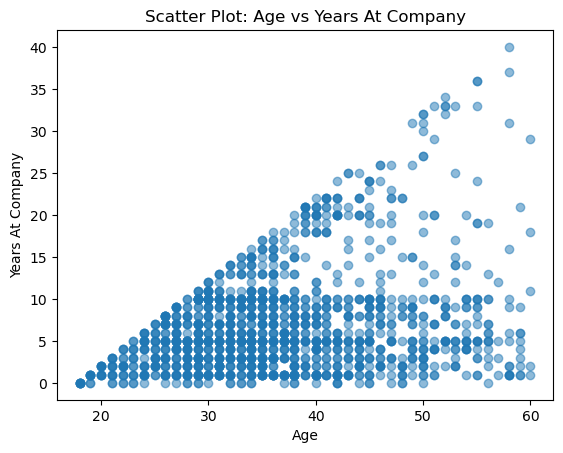

In [8]:
# Creating a scatter plot.

plt.scatter(df['Age'], df['YearsAtCompany'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Years At Company')
plt.title('Scatter Plot: Age vs Years At Company')

plt.show()

#### 1.2.3 'Resigned' column

The revised values in the 'Resigned' column should be numerical and contain only 1 for 'Yes' and 0 for 'No'. Let's view the variable's unique values and make necessary conversions.

In [9]:
df['Resigned'].unique()

array(['No', 'Yes', 'NO', nan, 'no', 'Y', 'N'], dtype=object)

To achieve the aim, I will follow the below algorithm:
1. Standardize the values - keep only 'Yes' and 'No';
2. Address the missing values - 'nan';
3. Convert to binary values - 1 for 'Yes' and 0 for 'No'.

In [10]:
# First, we need to standardize all the values. Here we will call our earlier created function 'replace_values'.

replacement_dict = {'Y' : 'Yes', 'N' : 'No', 'no' : 'No', 'NO' : 'No'}
replace_values(df, 'Resigned', replacement_dict) # calling the function

df['Resigned'].unique()

array(['No', 'Yes', nan], dtype=object)

As we can notice, there are some missing values in this column, appearing as 'nan'. To address them, let's find out how many of them we have in the DataFrame.

In [11]:
# Counting the missing values in the column - calling a function created earlier 'count_missing_values'.
count_missing_values(df, 'Resigned')

False    1480
True        2
Name: Resigned, dtype: int64

As we can see on the output, there are 2 missing values. In this case, considering such a low amount, it is reasonable to replace it with the mode value (the most frequent one).

In [12]:
# Replacing the missing values with the mode (the most frequent value). 
# Here we will call the function 'replace_missing_with_mode'.
replace_missing_with_mode(df, 'Resigned')

df['Resigned'].unique()

array(['No', 'Yes'], dtype=object)

After successfully eliminating the missing values, we can finally convert it to binary values.

In [13]:
# Converting to binary values, using a function 'convert_to_binary'.
convert_to_binary(df, 'Resigned')

df.head(5)

,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,0,Non-Travel,Sales,3.0,Female,4.0,Single,5666.0,1,...,13,3,48.0,6,1,3.0,5,3,1,3
1,54,0,Travel_Rarely,Sales,4.0,Female,3.0,Married,10686.0,6,...,11,3,40.0,13,4,3.0,9,4,7,0
2,51,0,Travel_Rarely,Consultants,3.0,Female,2.0,Single,13734.0,3,...,18,3,40.0,21,6,3.0,7,7,1,0
3,38,0,Travel_Frequently,Consultants,4.0,Male,3.0,Married,5321.0,2,...,11,3,40.0,10,1,3.0,8,3,7,7
4,40,0,Travel_Frequently,Consultants,3.0,Female,3.0,Married,6323.0,1,...,11,3,40.0,10,2,4.0,10,9,9,4


#### 1.2.4 'BusinessTravel' column

Let's review the next column - 'BusinessTravel'.

In [14]:
df['BusinessTravel'].unique()

array(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently',
       'TRAVEL_RARELY', 'rarely_travel', 'Travels_Rarely'], dtype=object)

There are 3 different types of travel statuses and that's how the revised column variables should look like:
- FREQUENTLY;
- RARELY;
- NON_TRAVEL.

To improve efficiency and save memory, we will convert the final variables to categorical data types.
Here are the steps to follow:
1. Convert to uppercase;
2. Replace the values, removing 'travel';
3. Convert to a category.

In [15]:
# First, we need to standardize all the values. For consistency purposes, it's best to use uppercase.
convert_to_uppercase(df, 'BusinessTravel') # calling the 'convert_to_uppercase' function

df['BusinessTravel'].unique()

array(['NON-TRAVEL', 'TRAVEL_RARELY', 'TRAVEL_FREQUENTLY',
       'RARELY_TRAVEL', 'TRAVELS_RARELY'], dtype=object)

In [16]:
# To minimize spelling errors we can remove the verb "travel" and continue with straightforward adverbs.

replacement_dict = {
    'TRAVEL_RARELY':'RARELY', 
    'TRAVEL_FREQUENTLY':'FREQUENTLY', 
    'TRAVELS_RARELY':'RARELY', 
    'RARELY_TRAVEL':'RARELY', 
    'NON-TRAVEL':'NON_TRAVEL'
    }
replace_values(df, 'BusinessTravel', replacement_dict) # calling the 'replace_values' function


# Finally, we will convert the variable to the categorical data type, by calling the 'convert_to_category' function.
convert_to_category(df, 'BusinessTravel')

df['BusinessTravel'].unique()

['NON_TRAVEL', 'RARELY', 'FREQUENTLY']
Categories (3, object): ['FREQUENTLY', 'NON_TRAVEL', 'RARELY']

#### 1.2.5 'BusinessUnit' column

In [17]:
df['BusinessUnit'].unique()

array(['Sales', 'Consultants', 'Business Operations', 'Female'],
      dtype=object)

Similar algorithm will be applied to 'BusinessUnit' column. 
1. Handle an inappropriate value - 'Female';
2. Uppercase the values;
3. Format the writing - 'Business Operations;
4. Convert to a category.

As a result, there will be 3 categories:
- 'CONSULTANTS'
- 'SALES'
- 'OPERATIONS'.

In [18]:
# First, let's figure out how we can handle an inappropriate 'Female' value.
female_rows = df[df['BusinessUnit'] == 'Female']

female_rows

,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
735,56,1,RARELY,Female,2.0,Sales,4.0,Single,4993.0,7,...,6,3,64.0,8,0,1.0,6,4,0,5


In the output we can see that the values of two columns were misplaced: 'Female' should be under 'Gender' and 'Sales' should be under the 'BusinessUnit' column. Let's address this issue. 

In [19]:
# Getting the index of the row
index = female_rows.index[0]

# Swapping the values of 'BusinessUnit' and 'Gender' for the identified row
df.at[index, 'BusinessUnit'], df.at[index, 'Gender'] = df.at[index, 'Gender'], df.at[index, 'BusinessUnit']

df.loc[index]

Age                             56
Resigned                         1
BusinessTravel              RARELY
BusinessUnit                 Sales
EducationLevel                 2.0
Gender                      Female
JobSatisfaction                4.0
MaritalStatus               Single
MonthlyIncome               4993.0
NumCompaniesWorked               7
OverTime                       Yes
PercentSalaryHike                6
PerformanceRating                3
AverageWeeklyHoursWorked      64.0
TotalWorkingYears                8
TrainingTimesLastYear            0
WorkLifeBalance                1.0
YearsAtCompany                   6
YearsInRole                      4
YearsSinceLastPromotion          0
YearsWithCurrManager             5
Name: 735, dtype: object

In [20]:
# As a next step, let's use uppercase for consistency by calling the appropriate function.
convert_to_uppercase(df, 'BusinessUnit')

df['BusinessUnit'].unique()

array(['SALES', 'CONSULTANTS', 'BUSINESS OPERATIONS'], dtype=object)

In [21]:
# Next, it is best to convert 'Business Operations' to 'Operations' to avoid any spelling errors.

replacement_dict = {'BUSINESS OPERATIONS':'OPERATIONS'}
replace_values(df, 'BusinessUnit', replacement_dict) # calling the 'replace_values' function

df['BusinessUnit'].unique()

array(['SALES', 'CONSULTANTS', 'OPERATIONS'], dtype=object)

In [22]:
# As the last step, we will convert the object to categorical data type.
convert_to_category(df, 'BusinessUnit') # calling the function

df['BusinessUnit'].dtypes

CategoricalDtype(categories=['CONSULTANTS', 'OPERATIONS', 'SALES'], ordered=False)

#### 1.2.6 'EducationLevel' column

In [23]:
# Let's have a quick look at the unique values of the variable.
df['EducationLevel'].unique()

array([ 3.,  4.,  5.,  2.,  1., nan])

The given values are float numbers from 1 to 5, indicating the education level of the employees. I believe integers would be more valuable for further data analysis. The steps are the following:
1. Identify and address the missing values - 'nan';
2. Convert floats to ordinal data types, where 1 is the lowest and 5 is the highest education level.

In [24]:
# Counting the missing values in the column by calling a function 'count_missing_values'
count_missing_values(df, 'EducationLevel')

False    1481
True        1
Name: EducationLevel, dtype: int64

In [25]:
# To address this single missing value I will call the 'replace_missing_with_mode' function.
replace_missing_with_mode(df, 'EducationLevel')

df['EducationLevel'].unique()

array([3., 4., 5., 2., 1.])

In [26]:
# The next step is conversion of floats to ordinal values.

order = [1, 2, 3, 4, 5]
convert_to_ordinal(df, 'EducationLevel', order) # calling the 'convert_to_ordinal' function

df['EducationLevel'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

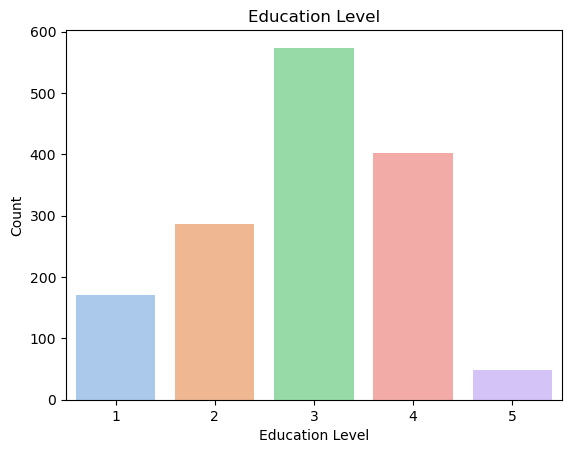

In [27]:
# Creating a bar plot for 'EducationLevel'

sns.countplot(data=df, x='EducationLevel', palette='pastel')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level')

plt.show()

#### 1.2.7 'Gender' column

In [28]:
# Let's review the column unique values
df['Gender'].unique()

array(['Female', 'Male', '    Female', '      Male', 'M', 'male', 'MMale'],
      dtype=object)

The final values should be: 
- 'M' for male;
- 'F' for the female gender.

To achieve that I will follow the below steps:
1. Remove the white spaces;
2. Correct the spelling mistakes - 'MMale';
3. Bring all values to uppercase;
4. Replace the 'MALE' with 'M' and 'FEMALE' with 'F';
5. Convert an object to a category.

In [29]:
# Removing white spaces using the function created earlier.
remove_whitespace(df, 'Gender')

# Correcting the spelling mistakes
replacement_dict = {'MMale' : 'Male'}
replace_values(df, 'Gender', replacement_dict) # calling the 'replace_values' function

# Converting all values to uppercase
convert_to_uppercase(df, 'Gender') # calling the 'convert_to_uppercase' function

# Replacing 'MALE' with 'M' and 'FEMALE' with 'F'
replacement_dict = {'MALE': 'M', 'FEMALE': 'F'}
replace_values(df, 'Gender', replacement_dict) # calling the 'replace_values' function

# Converting to a category
convert_to_category(df, 'Gender') # calling the 'convert_to_category' function

df['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

#### 1.2.8 'JobSatisfaction' column

In [30]:
# Reviewing the unique values in the column
df['JobSatisfaction'].unique()

array([ 4.,  3.,  2.,  1., nan])

This column is similar to the 'EducationLevel', where initially there are floats from 1.0 to 4.0 and some missing values are present. We will apply a similar algorithm here:
1. Find and handle missing values;
2. Convert floats to the ordered categories, where the highest value is 5 and the lowest is 1. 

In [31]:
# In order to identify missing values, I will call a function 'count_missing_values'
count_missing_values(df, 'JobSatisfaction')

False    1481
True        1
Name: JobSatisfaction, dtype: int64

In [32]:
# Then we will calculate and replace the missing value with the mode (the most frequent value).
replace_missing_with_mode(df, 'JobSatisfaction')

df['JobSatisfaction'].unique()

array([4., 3., 2., 1.])

In [33]:
# Next, we will convert the floats to categorical values with the specified order.

order = [1, 2, 3, 4, 5] # specifiyng the order
convert_to_ordinal(df, 'JobSatisfaction', order) # calling the 'convert_to_ordinal' function

df['JobSatisfaction'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

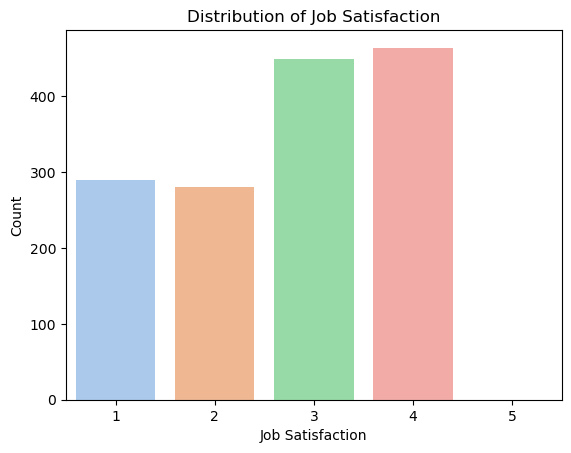

In [34]:
# Creating a bar plot for 'JobSatisfaction'

sns.countplot(data=df, x='JobSatisfaction', palette='pastel')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction')

plt.show()

#### 1.2.9 'MaritalStatus' column

In [35]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced', '         Single',
       '       Divorced', 'D'], dtype=object)

The final values should be the following:
- 'M'
- 'D'
- 'S'

Steps to follow:
1. Remove whitespace;
2. Replace the full words with their first letters.
3. Convert to a category.

In [36]:
# Calling the 'remove_whitespace' function for the whitespaces
remove_whitespace(df, 'MaritalStatus')

# Calling the function 'replace_values'
replacement_dict = {
    'Married' : 'M',
    'Divorced' : 'D',
    'Single' : 'S'}
replace_values(df, 'MaritalStatus', replacement_dict)

# Converting to a category using the function.
convert_to_category(df, 'MaritalStatus')

df['MaritalStatus'].dtype

CategoricalDtype(categories=['D', 'M', 'S'], ordered=False)

#### 1.2.10 'MonthlyIncome' column

In [37]:
df['MonthlyIncome'].head(5)

0     5666.0
1    10686.0
2    13734.0
3     5321.0
4     6323.0
Name: MonthlyIncome, dtype: float64

When it comes to the MonthlyIncome column, the following can be performed:
1. Scan for missing values;
2. Convert to an integer for more convenient mathematical calculations;
3. Scan for outliers.

In [38]:
count_missing_values(df, 'MonthlyIncome')

False    1479
True        3
Name: MonthlyIncome, dtype: int64

In [39]:
# Next, we need to find out the best way to replace the missing values.
monthly_income_summary = df['MonthlyIncome'].describe()

monthly_income_summary

count     1479.000000
mean      6487.800541
std       4698.064184
min       1009.000000
25%       2911.000000
50%       4900.000000
75%       8333.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [40]:
# Additionally, let's calculate the mode value as well. 
mi_mode = df['MonthlyIncome'].iloc[0]

mi_mode

5666.0

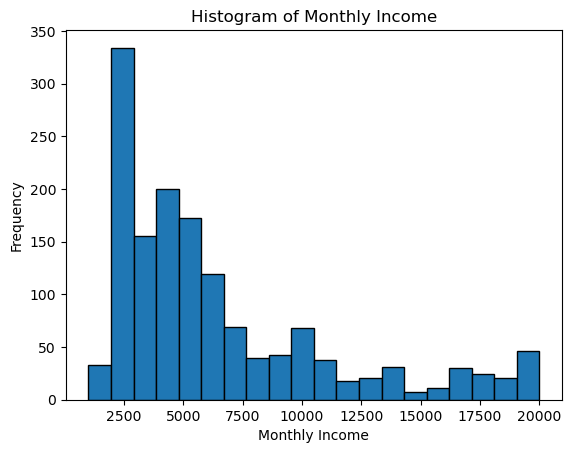

In [41]:
# All the values are different, so I will build a histogram to see the distribution of the data first.
plt.hist(df['MonthlyIncome'], bins=20, edgecolor='k')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Income')
plt.show()

In [42]:
# On the histogram we can notice the skewness, that is why the median value will be our choice.

# Calculating the median 
median_income = df['MonthlyIncome'].median()

# Filling missing values with the median
df['MonthlyIncome'].fillna(median_income, inplace=True)

# Verifying that missing values have been replaced
print("Missing values after imputation:", df['MonthlyIncome'].isna().sum())

Missing values after imputation: 0


In [43]:
# The next step is convertion to an integer type.
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

df['MonthlyIncome'].unique()

array([ 5666, 10686, 13734, ...,  4401, 10934,  4221])

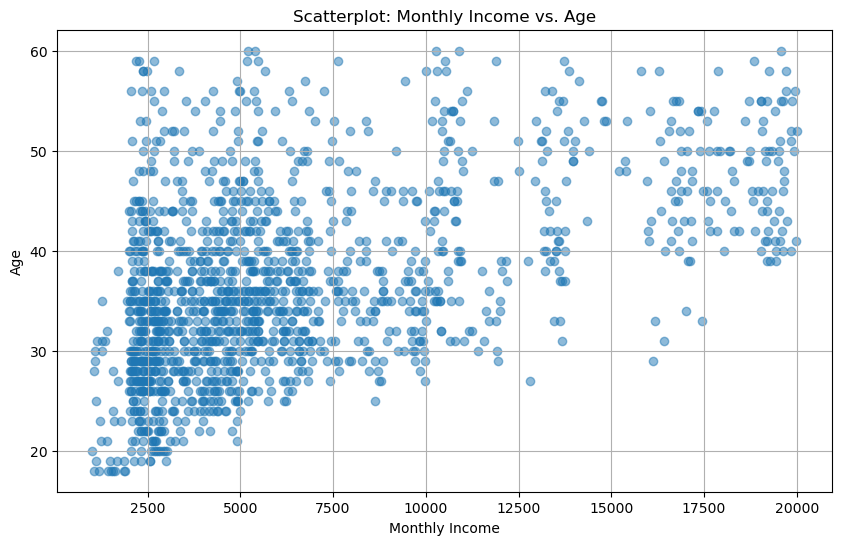

In [44]:
# Briefly scanning for outliers

plt.figure(figsize=(10, 6))
plt.scatter(df['MonthlyIncome'], df['Age'], alpha=0.5)
plt.title('Scatterplot: Monthly Income vs. Age')
plt.xlabel('Monthly Income')
plt.ylabel('Age')
plt.grid(True)

plt.show()

No significant outliers have been noticed.

#### 1.2.11 'NumCompaniesWorked' column

In [45]:
df['NumCompaniesWorked'].unique()

array([1, 6, 3, 2, 4, 0, 7, 8, 5, 9])

On the output we can see an array of integers from 0 to 9. No missing values. 

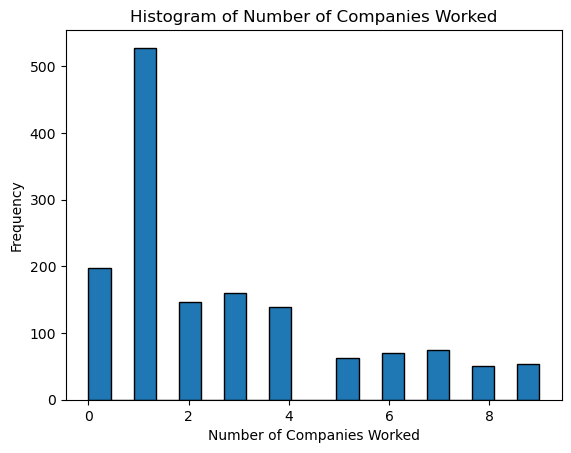

In [46]:
plt.hist(df['NumCompaniesWorked'], bins=20, edgecolor='k')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Companies Worked')
plt.show()

In [47]:
companies_summary = df['NumCompaniesWorked'].describe()
companies_summary

count    1482.000000
mean        2.695682
std         2.502362
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

All the numbers look relevant and realistic. 

#### 1.2.12 'OverTime' column

In [48]:
df['OverTime'].unique()

array(['Yes', 'No', nan], dtype=object)

1. Handle the missing values;
2. Convert to binary - o for 'No' and 1 for 'Yes'.

In [49]:
count_missing_values(df, 'OverTime') # calling the function

False    1479
True        3
Name: OverTime, dtype: int64

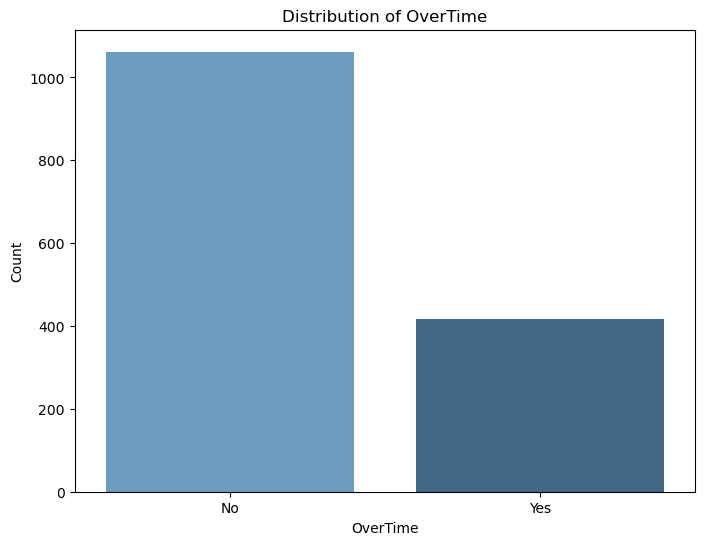

In [50]:
overtime_counts = df['OverTime'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=overtime_counts.index, y=overtime_counts.values, palette="Blues_d")
plt.title('Distribution of OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

On the bar plot we can notice that 'No' is the most common answer, so we will proceed with the mode value for the missing values replacement.

In [51]:
replace_missing_with_mode(df, 'OverTime') # calling the function

df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [52]:
# The final step is to replace 'Yes' and 'No' with binary values.
convert_to_binary(df, 'OverTime') # calling the function

df['OverTime'].unique()

array([1, 0])

#### 1.2.13 'PercentSalaryHike' column

In [53]:
df['PercentSalaryHike'].unique()

array([13, 11, 18, 14, 25, 15, 19, 23, 12, 20, 17, 22, 16, 21, 24,  0,  6,
       10])

1. No missing values;
2. No significant outliers at first sight, however, we will get a clearer picture after the visualization. 

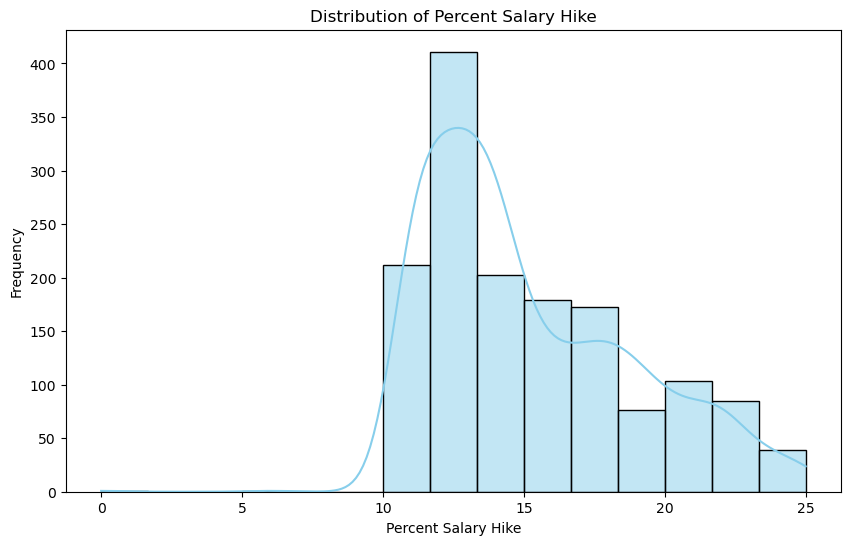

In [54]:
# Let's visually see the distribution of data. 

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PercentSalaryHike', bins=15, kde=True, color='skyblue')
plt.title('Distribution of Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Frequency')

plt.show()

In [55]:
# Let's count the zero values.
count_zero_salary_hike = (df['PercentSalaryHike'] == 0).sum()

print("Number of values equal to 0 in 'PercentSalaryHike':", count_zero_salary_hike)

Number of values equal to 0 in 'PercentSalaryHike': 1


In the histogram, a rare occurrence of zero values is causing a skewed distribution. Upon closer examination, we find that there is only a single instance with a value of 0. Treating this as an outlier can help bring the distribution closer to a bell-shaped curve.

In [56]:
zero_salary_hike_row = df[df['PercentSalaryHike'] == 0]

zero_salary_hike_row

,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
392,38,0,RARELY,CONSULTANTS,2,F,3,M,3700,1,...,0,2,46.0,5,3,3.0,5,4,0,3


With 5 years at the company and 4 years in the current role, this employee has never received a promotion, which is evident from the 'years since last promotion' being 0. Additionally, their performance rating is the lowest. Considering these factors, it's reasonable to conclude that this employee has never received a salary increase, which means that this zero value is not an outlier. 

#### 1.2.14 'PerformanceRating' column

In [57]:
df['PerformanceRating'].unique()

array([3, 4, 2])

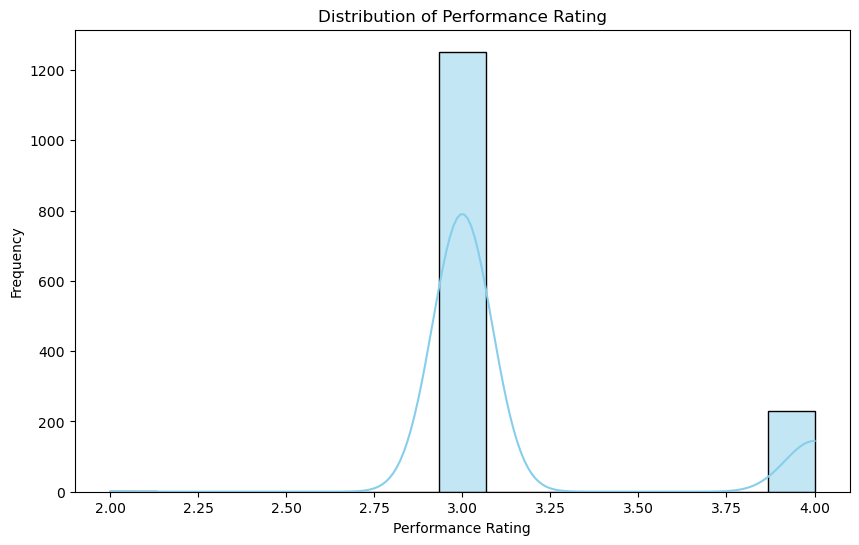

In [58]:
# Building a vizualization for the PerformaneRating
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PerformanceRating', bins=15, kde=True, color='skyblue')
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')

plt.show()

This variable appears relevant with no missing values, outliers, and the correct data type.

#### 1.2.15 'AverageWeeklyHoursWorked' column

In [59]:
# Outputing the unique values for this variable in ascending order
get_sorted_unique(df, 'AverageWeeklyHoursWorked') # calling the function

[40.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 69.0,
 70.0,
 71.0,
 400.0]

1. No missing values;
2. 40 to 71 hours weekly average is quite realistic, however 400 is a clear outlier.
3. Convert to an integer.

In [60]:
# Defining a reasonable range for weekly hours
lower_bound = 40
upper_bound = 71

# Calculating the replacement value (median within the range)
replacement_value = np.median(df[(df['AverageWeeklyHoursWorked'] >= lower_bound) & (df['AverageWeeklyHoursWorked'] <= upper_bound)]['AverageWeeklyHoursWorked'])

# Replacing the outliers with the replacement value
df.loc[(df['AverageWeeklyHoursWorked'] < lower_bound) | (df['AverageWeeklyHoursWorked'] > upper_bound), 'AverageWeeklyHoursWorked'] = replacement_value

# Proceeding with the conversion. 
df['AverageWeeklyHoursWorked'] = df['AverageWeeklyHoursWorked'].astype(int)

#Reconfirming the changes
unique_values_sorted_revised = sorted(df['AverageWeeklyHoursWorked'].unique())
unique_values_sorted_revised

[40,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71]

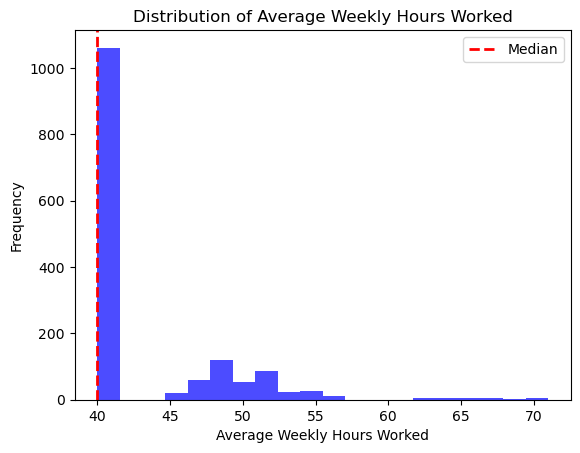

In [61]:
# Creating a histogram.

plt.hist(df['AverageWeeklyHoursWorked'], bins=20, color='blue', alpha=0.7)
plt.axvline(df['AverageWeeklyHoursWorked'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Average Weekly Hours Worked')
plt.ylabel('Frequency')
plt.title('Distribution of Average Weekly Hours Worked')
plt.legend()

plt.show()

#### 1.2.16 'TotalWorkingYears' column

In [62]:
# As previously, let's sort out the unique values for easier interpretation
total_years_sorted = sorted(df['TotalWorkingYears'].unique())

total_years_sorted

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40]

1. The data type is correct - an integer;
2. No outliers can be noticed;
3. No missing values.
4. No typos or errors.

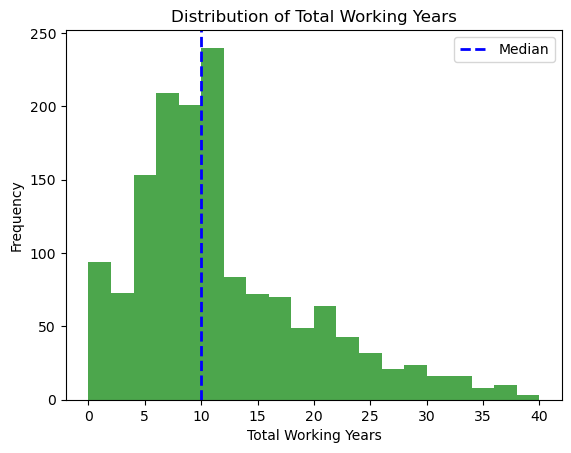

In [63]:
# Creating a histogram of the 'TotalWorkingYears' column

plt.hist(df['TotalWorkingYears'], bins=20, color='green', alpha=0.7)
plt.axvline(df['TotalWorkingYears'].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.title('Distribution of Total Working Years')
plt.legend()

plt.show()

#### 1.2.17 'TrainingTimesLastYear' column

In [64]:
df['TrainingTimesLastYear'].unique()

array([1, 4, 6, 2, 3, 5, 0])

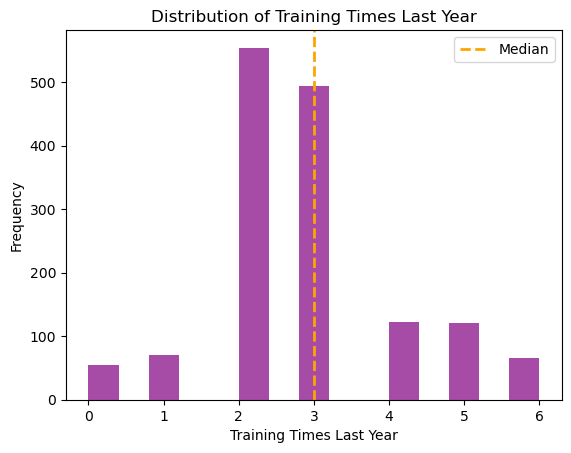

In [65]:
# Creating a histogram of the 'TrainingTimesLastYear' column

plt.hist(df['TrainingTimesLastYear'], bins=15, color='purple', alpha=0.7)
plt.axvline(df['TrainingTimesLastYear'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Training Times Last Year')
plt.ylabel('Frequency')
plt.title('Distribution of Training Times Last Year')
plt.legend()

plt.show()

1. The data type is correct - an integer;
2. No missing values;
3. No outliers. 

#### 1.2.18 'WorkLifeBalance' column

In [66]:
df['WorkLifeBalance'].unique()

array([ 3.,  4.,  2.,  1., nan])

1. Scan and address the missing values;
2. Convert to ordered categories - 1 is the lowest and 5 is the highest.

In [67]:
# Counting the missing values in the column - calling a function
count_missing_values(df, 'WorkLifeBalance')

False    1481
True        1
Name: WorkLifeBalance, dtype: int64

In [68]:
# Replacing the single missing value with the mode (the most frequent value). 

# Here we will call the function 'replace_missing_with_mode'.
replace_missing_with_mode(df, 'WorkLifeBalance')

df['WorkLifeBalance'].unique()

array([3., 4., 2., 1.])

In [69]:
# Lasly, we will convert the floats to ordinal values.

order = [1, 2, 3, 4, 5]
convert_to_ordinal(df, 'WorkLifeBalance', order) # calling the 'convert_to_ordinal' function

df['WorkLifeBalance'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

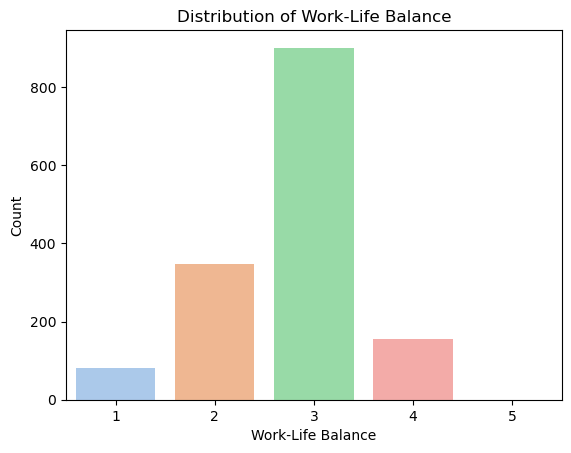

In [70]:
# Creating a bar plot for 'WorkLifeBalance'

sns.countplot(data=df, x='WorkLifeBalance', palette='pastel')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.title('Distribution of Work-Life Balance')

plt.show()

#### 1.2.19 'YearsAtCompany' column

In [71]:
# Retrieving the unique values in ascending order using the function 'get_sorted_unique'.
get_sorted_unique(df, 'YearsAtCompany')

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 40]

1. The data type is correct (integer);
2. No missing values;
3. Outliers - while there are no visual outliers, it's advisable to examine this variable in conjunction with 'TotalWorkingYears' for a more comprehensive analysis.

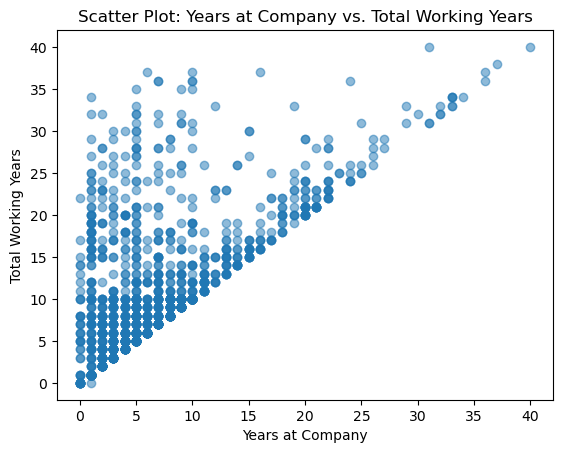

In [72]:
# Creating a scatter plot

plt.scatter(df['YearsAtCompany'], df['TotalWorkingYears'], alpha=0.5)
plt.xlabel('Years at Company')
plt.ylabel('Total Working Years')
plt.title('Scatter Plot: Years at Company vs. Total Working Years')

plt.show()

The scatterplot confirms the absence of outliers or inconsistencies.

#### 1.2.20 'YearsInRole' column

In [73]:
get_sorted_unique(df, 'YearsInRole') # using the same as above function for sorted unique values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

1. No missing values;
2. Correct data type (integer);
3. No apparent outliers. Let's verify with a visualization.

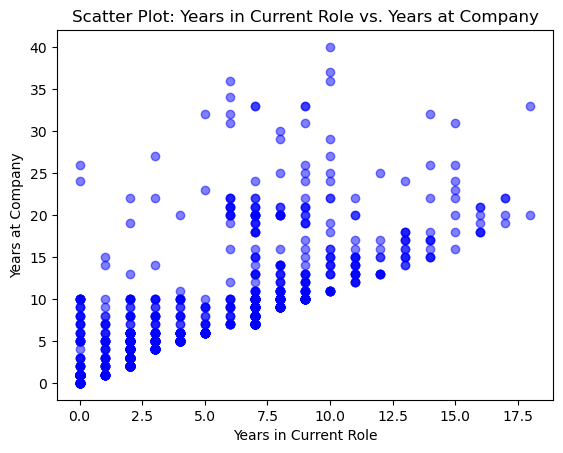

In [74]:
# Creating a scatter plot

plt.scatter(df['YearsInRole'], df['YearsAtCompany'], alpha=0.5, color='blue')
plt.xlabel('Years in Current Role')
plt.ylabel('Years at Company')
plt.title('Scatter Plot: Years in Current Role vs. Years at Company')

plt.show()

The data distribution in the scatterplot appears quite intuitive and realistic.

#### 1.2.21 'YearsSinceLastPromotion' column

In [75]:
get_sorted_unique(df, 'YearsSinceLastPromotion') # using the same as above function for sorted unique values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

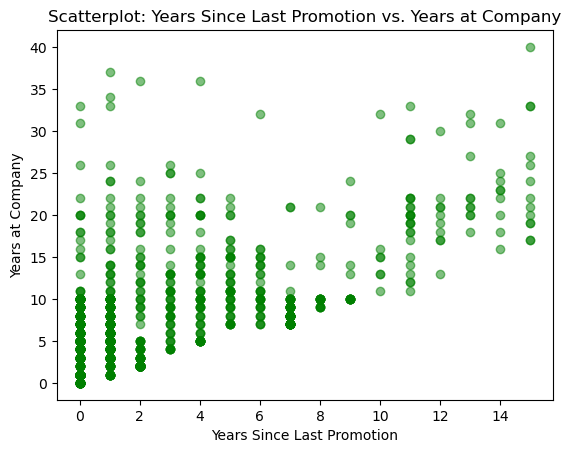

In [76]:
# Creating a scatter plot to scan for any outliers or errors

plt.scatter(df['YearsSinceLastPromotion'], df['YearsAtCompany'], alpha=0.5, color='green')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Years at Company')
plt.title('Scatterplot: Years Since Last Promotion vs. Years at Company')

plt.show()

The scatterplot exhibits a valid and logically distributed pattern.

#### 1.2.22 'YearsWithCurrManager' column

In [77]:
get_sorted_unique(df, 'YearsWithCurrManager') # using the same as above function for sorted unique values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

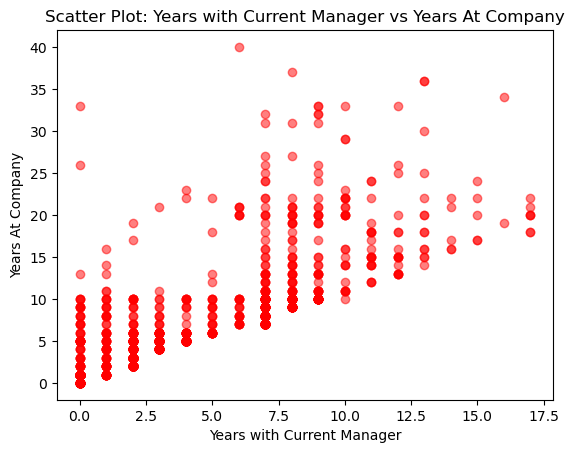

In [78]:
# Creating a scatter plot to visualize the variable

plt.scatter(df['YearsWithCurrManager'], df['YearsAtCompany'], alpha=0.5, color='red')
plt.xlabel('Years with Current Manager')
plt.ylabel('Years At Company')
plt.title('Scatter Plot: Years with Current Manager vs Years At Company')

plt.show()

The variable looks free from outliers, errors and missing values.

## 2 Data Exploration

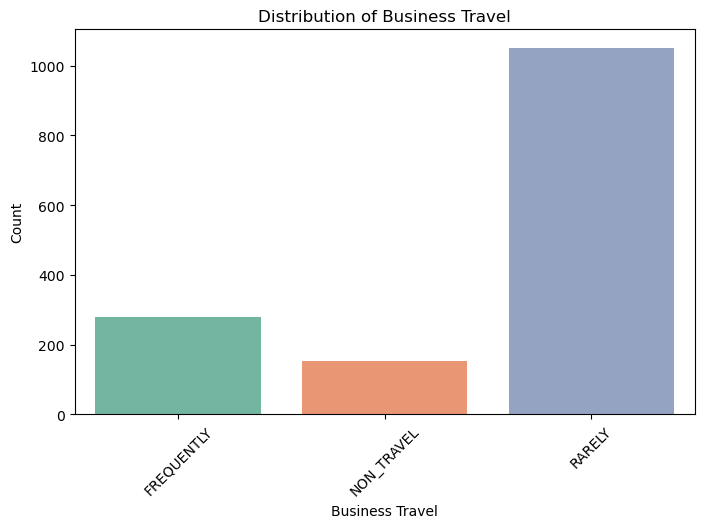

In [79]:
# 1. Visualization for BusinessTravel (Bar Chart)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='BusinessTravel', palette='Set2')
plt.title('Distribution of Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

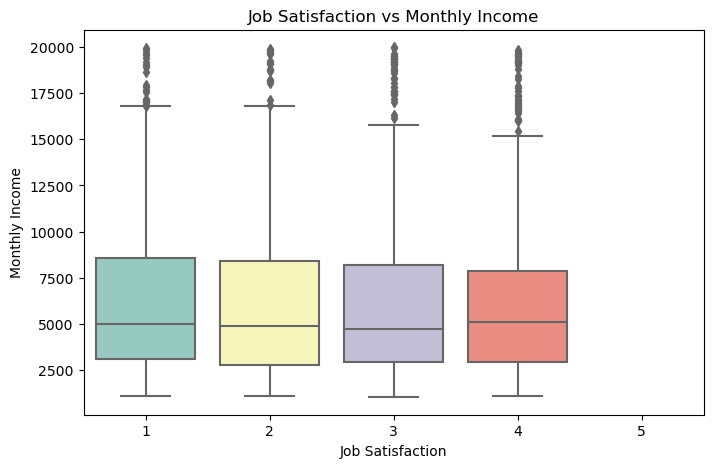

In [80]:
# 2. Visualization for JobSatisfaction (Box Plot)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='JobSatisfaction', y='MonthlyIncome', palette='Set3')
plt.title('Job Satisfaction vs Monthly Income')
plt.xlabel('Job Satisfaction')
plt.ylabel('Monthly Income')

plt.show()

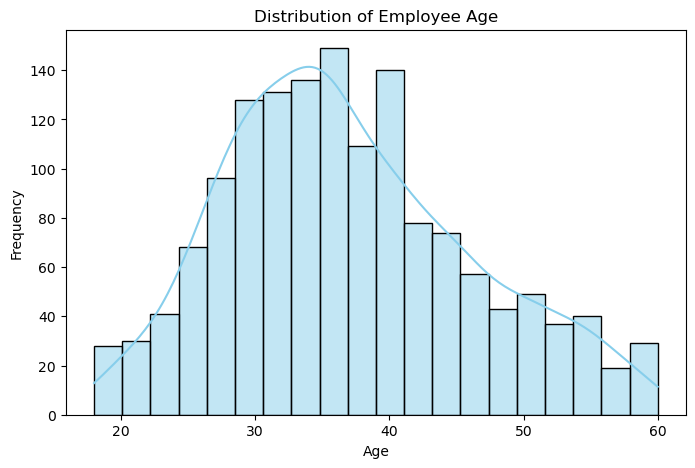

In [81]:
# 3. Visualization for Age (Histogram)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Employee Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

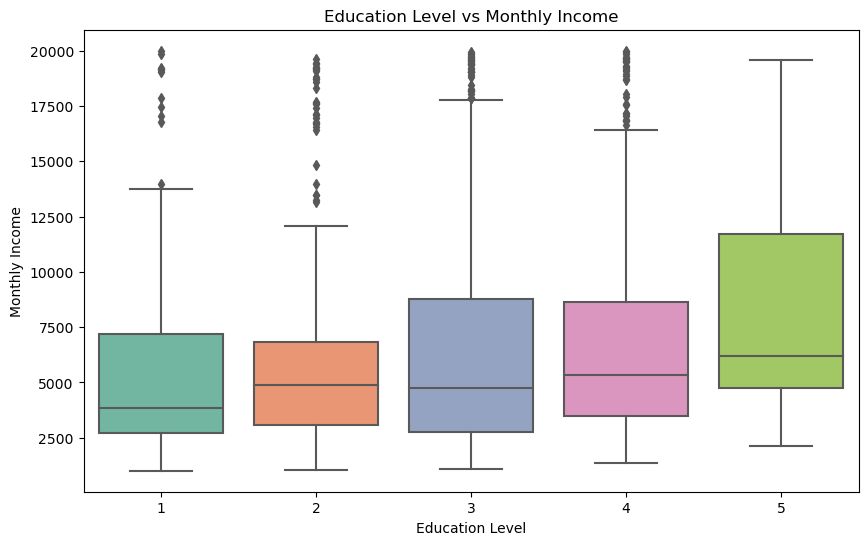

In [82]:
# 4. Visualization for EducationLevel vs MonthlyIncome (Box Plot)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EducationLevel', y='MonthlyIncome', palette='Set2')
plt.title('Education Level vs Monthly Income')
plt.xlabel('Education Level')
plt.ylabel('Monthly Income')

plt.show()

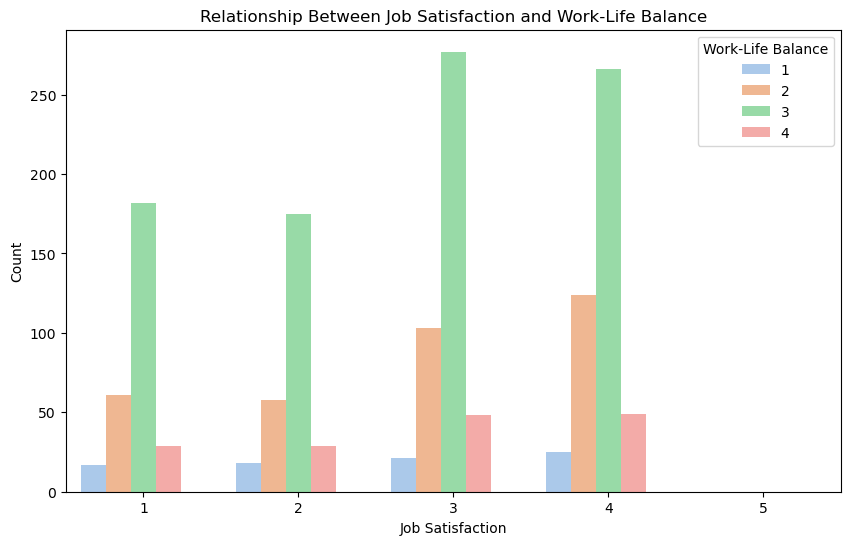

In [83]:
# 5. Job Satisfaction vs. Work-Life Balance

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSatisfaction', hue='WorkLifeBalance', palette='pastel')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Relationship Between Job Satisfaction and Work-Life Balance')
plt.legend(title='Work-Life Balance', loc='upper right', labels=['1', '2', '3', '4'])

plt.show()

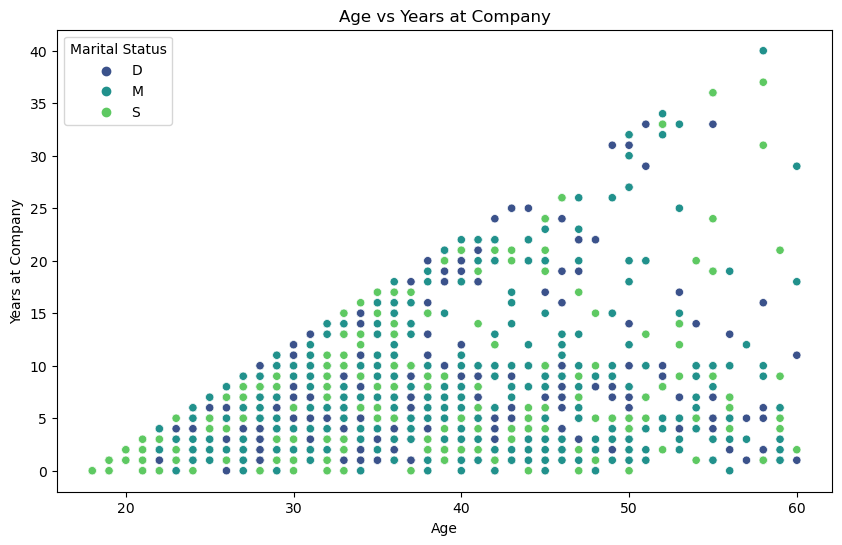

In [84]:
# 6. Visualization for Age vs YearsAtCompany (Scatter Plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsAtCompany', hue='MaritalStatus', palette='viridis')
plt.title('Age vs Years at Company')
plt.xlabel('Age')
plt.ylabel('Years at Company')
plt.legend(title='Marital Status')

plt.show()

In [85]:
df.to_csv('assignment1.csv')